In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA

# Meta-population SEIR model with 3 regions

## Build flux function

In [2]:
Phi_matrix = np.array([[0,100,1000],
                       [80,0,300],
                       [1000,1500,0]])

In [3]:
def Phi(t):
    if t<100:
        return np.zeros([3,3])
    elif t%1<0.5:
        return Phi_matrix
    else:
        return Phi_matrix.transpose()


In [4]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])
population = np.array([100000,200000,150000])

I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1#np.array([1,1,1])

In [5]:
cfg = '/home/samuel/covid19geomodeller/config_files/SEIRMETA.toml'

In [6]:
seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,rR_S=rR_S,t_end=500)

In [7]:
seir.solve()

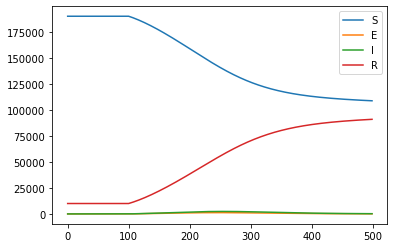

In [8]:
i = 1
plt.plot(seir.t,seir.S[i],label='S')
plt.plot(seir.t,seir.E[i],label='E')
plt.plot(seir.t,seir.I[i],label='I')
plt.plot(seir.t,seir.R[i],label='R')
plt.legend(loc=0)
plt.show()


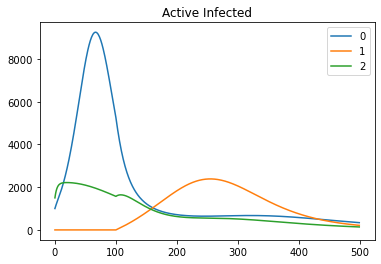

In [9]:
plt.plot(seir.t,seir.I[0],label='0')
plt.plot(seir.t,seir.I[1],label='1')
plt.plot(seir.t,seir.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

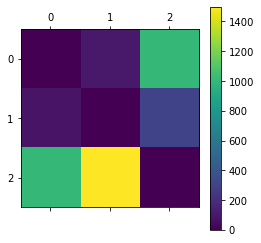

In [10]:
plt.matshow(seir.Phi(100))
plt.colorbar()
plt.show()

## Output

In [12]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,node
0,0,93000,1000,100,1000,100,4999,0,0
1,1,92805,995,160,1094,162,5104,66,0
2,2,92594,1006,193,1180,186,5218,96,0
3,3,92368,1029,214,1261,197,5340,113,0
4,4,92128,1060,231,1340,204,5470,124,0
...,...,...,...,...,...,...,...,...,...
1495,495,80608,52,10,143,13,69219,163,2
1496,496,80581,51,10,141,13,69248,163,2
1497,497,80554,51,10,140,13,69277,163,2
1498,498,80527,50,9,139,13,69305,163,2


In [13]:
seir.params

,t,beta,tE_I,tI_R,rR_S,node
0,0,0.20,5.0,10.0,0,0
1,1,0.20,5.0,10.0,0,0
2,2,0.20,5.0,10.0,0,0
3,3,0.20,5.0,10.0,0,0
4,4,0.20,5.0,10.0,0,0
...,...,...,...,...,...,...
1495,495,0.11,5.0,10.0,0,2
1496,496,0.11,5.0,10.0,0,2
1497,497,0.11,5.0,10.0,0,2
1498,498,0.11,5.0,10.0,0,2
